In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import matplotlib
import matplotlib.pylab as P
import json
import numpy as np
from pprint import pprint, pformat

In [3]:
from data.dataset import AnnotatedData
d = AnnotatedData.load('data/senna0')

In [4]:
for split in ['train', 'dev', 'test']:
    total = len(d.splits[split].examples)
    print total, split, 'examples'

22543 train examples
6415 dev examples
3366 test examples


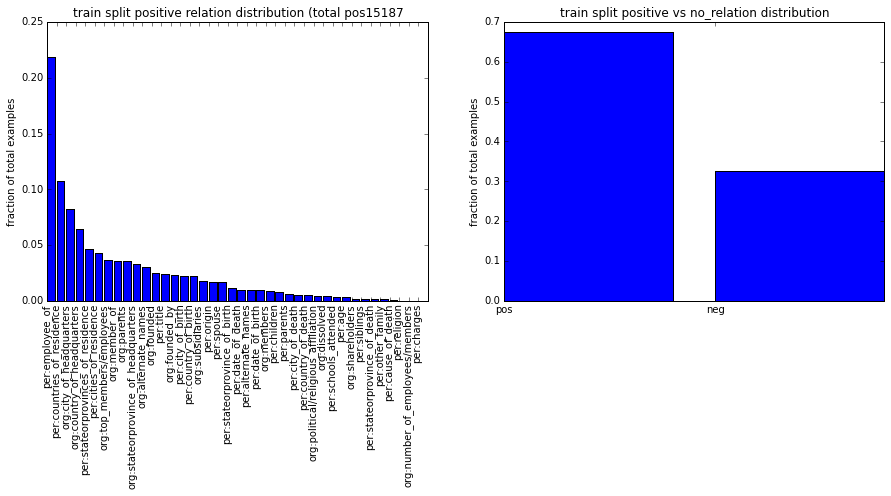

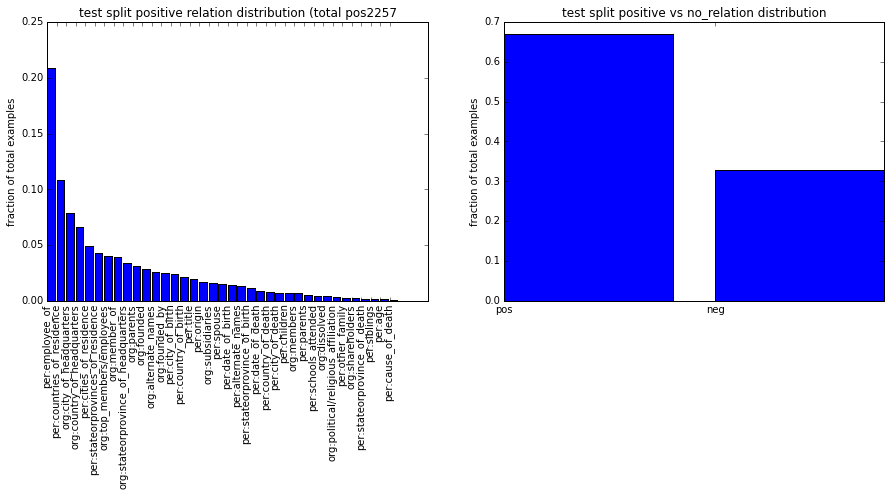

In [5]:
def plot_histogram(name, ax, counts, order, neg_count):
    pos_count = np.sum(counts)
    names = [d.rel_vocab.index2word[o] for o in order]
    ax[0].set_title(name + ' split positive relation distribution (total pos' + str(pos_count))
    ax[0].bar(np.arange(len(counts)), counts/float(counts.sum()))
    ax[0].set_xticks(np.arange(len(names)))
    ax[0].set_xticklabels(names, rotation=90)
    ax[0].set_ylabel('fraction of total examples')
    
    total = float(pos_count + neg_count)
    ax[1].set_title(name + ' split positive vs no_relation distribution')
    ax[1].bar(np.arange(2), [pos_count / total, neg_count / total])
    ax[1].set_xticks(np.arange(2))
    ax[1].set_xticklabels(['pos', 'neg'])
    ax[1].set_ylabel('fraction of total examples')
    
from collections import Counter

def count_relations(split):
    pos = []
    neg_count = 0
    for ex in d.splits[split].examples:
        if ex.relation == d.rel_vocab['no_relation']:
            neg_count += 1
        else:
            pos.append(ex.relation)
    counts = Counter(pos)
    order = np.array([e[0] for e in counts.most_common()])
    pos_counts = np.array([e[1] for e in counts.most_common()])
    return pos_counts, order, neg_count

P.close('all')

for split in ['train', 'test']:
    fig, ax = P.subplots(1, 2, figsize=(15, 5))
    plot_histogram(split, ax, *count_relations(split))